In [1]:
import pandas as pd
import numpy as np 


In [2]:
file1 = pd.read_csv("World_Happiness_2015.csv")
file2 = pd.read_csv("World_Happiness_2016.csv")
file3 = pd.read_csv("World_Happiness_2017.csv")


In [4]:
file1["year"] = 2015
file2["year"] = 2016
file3["year"] = 2017


In [15]:
combine = pd.concat([file1,file2], sort=True,join="inner", ignore_index=True) #removes NaN values as only common columns merged
combine #ignore_index set to True gives data own index, avoids duplicates
#combine.columns        lists all column headers
#combine.index.duplicated()   checks for any duplicates in index

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption),year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015
5,Finland,2.61955,1.29025,1.31826,0.64169,0.23351,6,7.406,0.88911,Western Europe,0.41372,2015
6,Netherlands,2.46570,1.32944,1.28017,0.61576,0.47610,7,7.378,0.89284,Western Europe,0.31814,2015
7,Sweden,2.37119,1.33171,1.28907,0.65980,0.36262,8,7.364,0.91087,Western Europe,0.43844,2015
8,New Zealand,2.26425,1.25018,1.31967,0.63938,0.47501,9,7.286,0.90837,Australia and New Zealand,0.42922,2015
9,Australia,2.26646,1.33358,1.30923,0.65124,0.43562,10,7.284,0.93156,Australia and New Zealand,0.35637,2015


In [16]:
three_15 = file1[["Country", "Happiness Rank", "year"]].head(3)
three_15

,Country,Happiness Rank,year
0,Switzerland,1,2015
1,Iceland,2,2015
2,Denmark,3,2015


In [17]:
three_16 = file2[["Country", "Happiness Rank", "year"]][2:5]
three_16

,Country,Happiness Rank,year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [18]:
pd.concat([three_15, three_16], axis=1)

,Country,Happiness Rank,year,Country,Happiness Rank,year
0,Switzerland,1.0,2015.0,NaN,NaN,NaN
1,Iceland,2.0,2015.0,NaN,NaN,NaN
2,Denmark,3.0,2015.0,Iceland,3.0,2016.0
3,NaN,NaN,NaN,Norway,4.0,2016.0
4,NaN,NaN,NaN,Finland,5.0,2016.0


In [25]:
pd.merge(left=three_15, right=three_16, on="Country", how="left", suffixes=(" 2015", " 2016")) #left join, checks if 2015 country in same index in 2016
#merge works on axis=1

,Country,Happiness Rank 2015,year 2015,Happiness Rank 2016,year 2016
0,Switzerland,1,2015,NaN,NaN
1,Iceland,2,2015,3.0,2016.0
2,Denmark,3,2015,NaN,NaN


In [29]:
pd.merge(left=three_15, right=three_16, left_index=True, right_index=True, how="inner", suffixes=(" 2015", " 2016")) #on index basis

,Country 2015,Happiness Rank 2015,year 2015,Country 2016,Happiness Rank 2016,year 2016
2,Denmark,3,2015,Iceland,3,2016


In [39]:
file3.rename({"Happiness.Score":"Happiness Score"},inplace= True, axis = 1)


In [40]:
hpscore_combined = pd.concat([file1, file2, file3], sort=True, ignore_index=True)
hpscore_combined

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.349510,0.665570,0.296780,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.402230,0.628770,0.436300,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,NaN,1.360580,0.649380,0.341390,3.0,7.527,...,NaN,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,NaN,2015
3,Norway,2.46531,NaN,1.45900,NaN,1.330950,0.669730,0.346990,4.0,7.522,...,NaN,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,NaN,2015
4,Canada,2.45176,NaN,1.32629,NaN,1.322610,0.632970,0.458110,5.0,7.427,...,NaN,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,NaN,2015
5,Finland,2.61955,NaN,1.29025,NaN,1.318260,0.641690,0.233510,6.0,7.406,...,NaN,NaN,Western Europe,0.03140,0.41372,NaN,NaN,NaN,NaN,2015
6,Netherlands,2.46570,NaN,1.32944,NaN,1.280170,0.615760,0.476100,7.0,7.378,...,NaN,NaN,Western Europe,0.02799,0.31814,NaN,NaN,NaN,NaN,2015
7,Sweden,2.37119,NaN,1.33171,NaN,1.289070,0.659800,0.362620,8.0,7.364,...,NaN,NaN,Western Europe,0.03157,0.43844,NaN,NaN,NaN,NaN,2015
8,New Zealand,2.26425,NaN,1.25018,NaN,1.319670,0.639380,0.475010,9.0,7.286,...,NaN,NaN,Australia and New Zealand,0.03371,0.42922,NaN,NaN,NaN,NaN,2015
9,Australia,2.26646,NaN,1.33358,NaN,1.309230,0.651240,0.435620,10.0,7.284,...,NaN,NaN,Australia and New Zealand,0.04083,0.35637,NaN,NaN,NaN,NaN,2015


In [41]:
mean = hpscore_combined.pivot_table(index="Region", values="Happiness Score")
mean

,Happiness Score
Region,
Australia and New Zealand,7.304250
Central and Eastern Europe,5.351810
Eastern Asia,5.625167
Latin America and Caribbean,6.122283
Middle East and Northern Africa,5.396744
North America,7.263500
Southeastern Asia,5.328167
Southern Asia,4.572071
Sub-Saharan Africa,4.170462


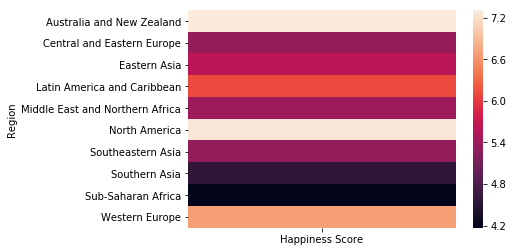

In [49]:
import seaborn as sb
sb.heatmap(mean)